In [5]:
import pandas as pd

df = pd.read_csv("bank-full.csv", sep=";")  # or bank-additional-full.csv
print(df.shape, df.columns)
print(df['y'].value_counts(normalize=True))


(45211, 17) Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [8]:
!pip install scikit-learn


In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [10]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop('y', axis=1)
y = LabelEncoder().fit_transform(df['y'])
X = pd.get_dummies(X, drop_first=True)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [10, 20, 50]
}
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best = grid.best_estimator_
print(grid.best_params_, grid.best_score_)


{'max_depth': 6, 'min_samples_leaf': 50} 0.9014323194833864


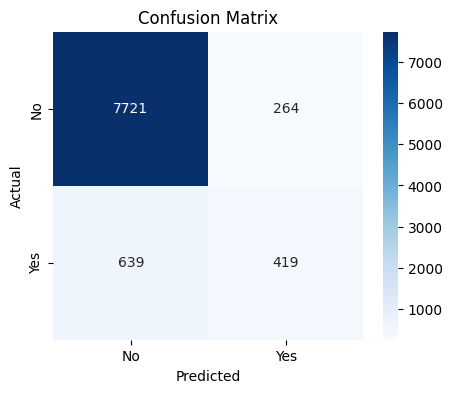

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [10, 20, 50]
}
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best = grid.best_estimator_
print(grid.best_params_, grid.best_score_)


{'max_depth': 6, 'min_samples_leaf': 50} 0.9014323194833864


Accuracy: 0.9001437576025655
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.61      0.40      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



Text(0.5, 1.0, 'Confusion Matrix')

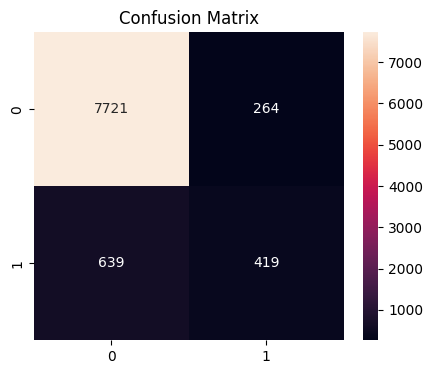

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

y_pred = best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")


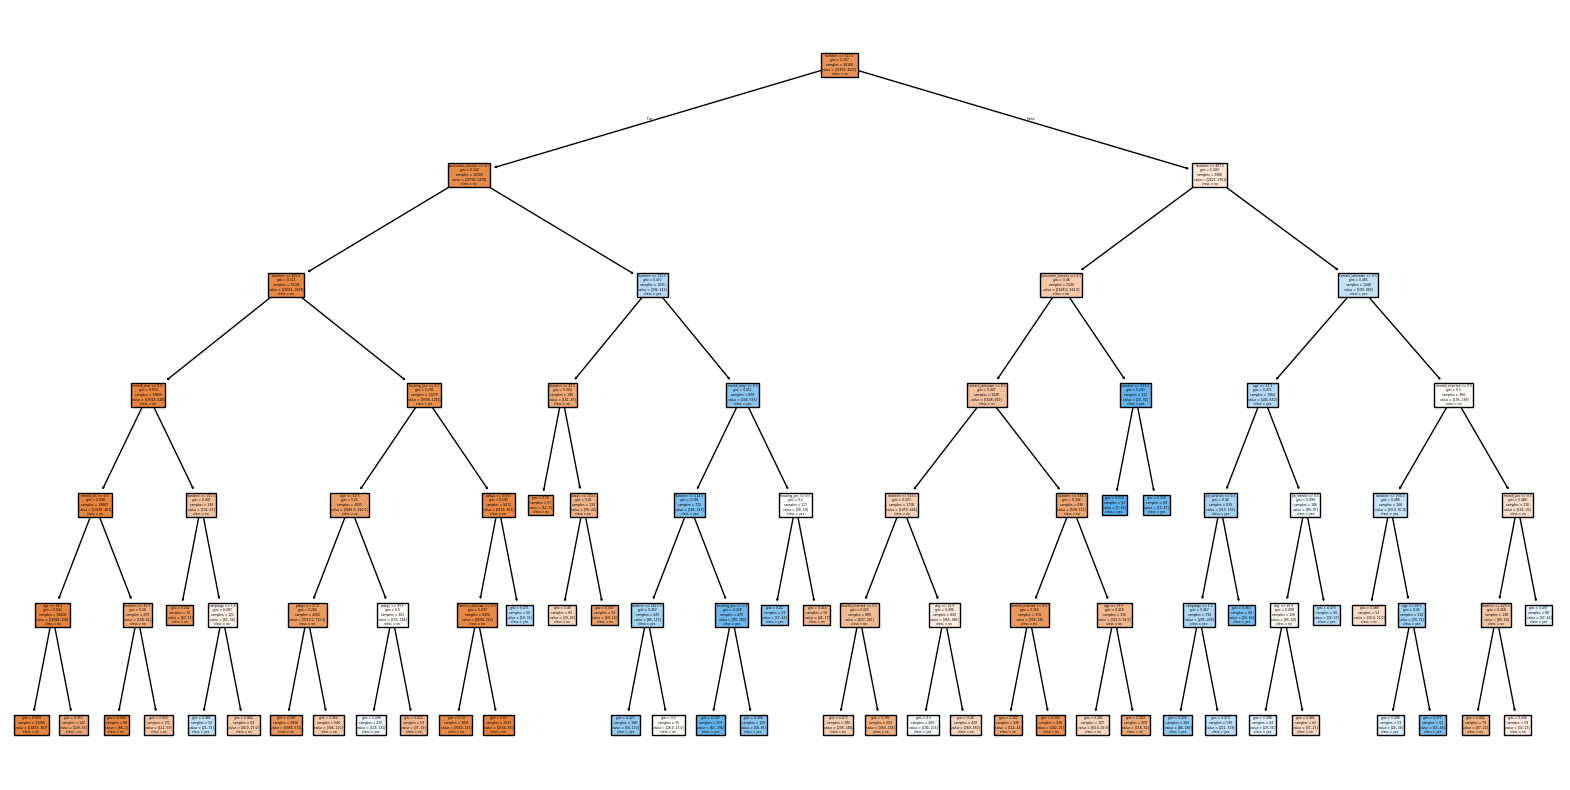

In [18]:
plt.figure(figsize=(20,10))
tree.plot_tree(best, feature_names=X.columns, class_names=['no','yes'], filled=True)
plt.show()
